In [3]:
import pandas as pd
import numpy as np
from datetime import timedelta
import datetime
import matplotlib.pyplot as plt
%matplotlib inline


path="C:\\Users\\marwe\\Desktop\\Trump_tweet_news_stock"
#read trump tweets
df_tweets=pd.read_csv(path+"\\realdonaldtrump.csv")
print(df_tweets.head())


#stock news
df_stock_news=pd.read_csv("C:\\Users\\marwe\\Desktop\\LaTeX JOTA\\us_equities_news_dataset.csv")
print(df_stock_news.head())

#read the news dataset from usa today
df_news=pd.read_csv(path+"\\USA Today.csv")
print(df_news.head())

#read nasdaq, s&p500 and dow

df_nasdaq=pd.read_csv(path+"\\NASDAQ_price.csv")
print(df_nasdaq.head())



df_Dow=pd.read_csv(path+"\\DowJones_price.csv")
print(df_Dow.head())

df_sp=pd.read_csv("C:\\Users\\marwe\\Desktop\\Trump_tweet_news_stock\\SP_price.csv")
print(df_sp.head())



#preparing the news dataset
'''
we will first rearrange the news then add columns for the stock market
dates are between election and 2020-04-03 (one day after the news stop)

'''

df_stock_news=df_stock_news.rename(columns={"release_date":"Date"})
df_stock_news['Date'] = pd.to_datetime(df_stock_news['Date']) 
df_stock_news['Date'] = pd.to_datetime(df_stock_news['Date']) 
mask = (df_stock_news['Date'] >= '2016-11-8' )
df_stock_news=df_stock_news.loc[mask]
col=['Date','title']
df_stock_news=df_stock_news[col]

#df_stock_news.content = np.where(df_stock_news.content.isnull(),str(df_stock_news.Date),str(df_stock_news.content))
#toronto_df['Neighbourhood'] = toronto_df.groupby(['Postcode','Borough'])['Neighbourhood'].agg(lambda x: ','.join(x))

df_stock_news['title']=df_stock_news['title'].fillna(" ")
df_stock_news['title'] = df_stock_news[['Date','title']].groupby(['Date'])['title'].transform(lambda x: '. '.join(x))
df_stock_news=df_stock_news[['Date','title']].drop_duplicates()
print(df_stock_news.head())

#col_selection=["news","money","onpolitics","theoval"]
col=['date','title','level2']
df_news=df_news[col]
print(df_news.head())
#df_news=df_news.loc[df_news['level2'] != 'sports']
#df_news=df_news.loc[df_news['level2'] != 'entertainment']
#df_news=df_news.loc[df_news['level2'] != 'travel']
#df_news=df_news.loc[df_news['level2'] != 'gameon']
#df_news=df_news.loc[df_news['level2'] != 'music']
df_news=df_news.loc[(df_news['level2'] == "news")|(df_news['level2'] == "money")|(df_news['level2'] == "onpolitics")|(df_news['level2'] == "theoval")]
#pick between the dates needed
df_news=df_news.rename(columns={"date":"Date"})
df_news['Date'] = pd.to_datetime(df_news['Date']) 
mask = (df_news['Date'] >= '2016-11-8' )
df_news=df_news.loc[mask]
col=['Date','title']
df_news=df_news[col]
df_news['title'] = df_news[['Date','title']].groupby(['Date'])['title'].transform(lambda x: '. '.join(x))
df_news=df_news[['Date','title']].drop_duplicates()
print(df_news.head())

def sub_one(x):
	return x -timedelta(days=1)

#make sure dow nasdaq and s&p are recorded between the 2 dates
#dow
df_Dow['Date'] = pd.to_datetime(df_Dow['Date']) 
mask = (df_Dow['Date'] >= '2016-11-8') &  (df_Dow['Date'] <= '2020-4-3')
df_Dow=df_Dow.loc[mask]
colo=['Date','Open','Close','Adj Close']
df_Dow=df_Dow[colo]
df_Dow['Adj Close']=np.where(df_Dow['Close']>=df_Dow['Open'],1,0)
df_Dow=df_Dow.rename(columns={"Adj Close":"Up_Dow"})
df_Dow=df_Dow.rename(columns={"Close":"Close_Dow"})
df_Dow['Date']=df_Dow['Date'].apply(sub_one)

#col_Dow=['Date','Up_Dow']
#df_Dow=df_Dow.loc[col_Dow]


#nasdaq
df_nasdaq['Date'] = pd.to_datetime(df_nasdaq['Date']) 
mask = (df_nasdaq['Date'] >= '2016-11-8') &  (df_nasdaq['Date'] <= '2020-4-3')
df_nasdaq=df_nasdaq.loc[mask]
df_nasdaq=df_nasdaq.dropna()
df_nasdaq=df_nasdaq[colo]
df_nasdaq['Adj Close']=np.where(df_nasdaq['Close']>=df_nasdaq['Open'],1,0)
df_nasdaq=df_nasdaq.rename(columns={"Adj Close":"Up_nas"})
df_nasdaq=df_nasdaq.rename(columns={"Close":"Close_nas"})
df_nasdaq['Date']=df_nasdaq['Date'].apply(sub_one)
#col_nasdaq=['Date','Close_nas','Up_nas']
#df_nasdaq=df_nasdaq.loc[col_nasdaq]

#SP
df_sp['Date'] = pd.to_datetime(df_sp['Date']) 
mask = (df_sp['Date'] >= '2016-11-8') &  (df_sp['Date'] <= '2020-4-3')
df_sp=df_sp.loc[mask]
df_sp=df_sp.dropna()
df_sp=df_sp[colo]
df_sp['Adj Close']=np.where(df_sp['Close']>=df_sp['Open'],1,0)
df_sp=df_sp.rename(columns={"Adj Close":"Up_sp"})
df_sp=df_sp.rename(columns={"Close":"Close_sp"})
df_sp['Date']=df_sp['Date'].apply(sub_one)

#col_sp=['Date','Close_sp','Up_sp']
#df_sp=df_sp.loc[col_sp]

#trying merge
margo=pd.merge(df_news, df_Dow, how='outer', on='Date')
margo=pd.merge(margo,df_nasdaq, how='outer', on='Date')
df_news_pred=pd.merge(margo,df_sp, how='outer', on='Date')
df_news_pred=pd.merge(df_news_pred,df_stock_news, how='outer', on='Date')



col_margo=['Date','title_x','Close_Dow','Up_Dow','Close_nas','Up_nas','Close_sp','Up_sp','title_y']
df_news_pred=df_news_pred[col_margo]
df_news_pred=df_news_pred.dropna()
df_news_pred['title_x'] = df_news_pred[['Date','title_x','title_y']].groupby(['Date'])['title_x'].transform(lambda x: '. '.join(x))
col_margo=['Date','title_x','Close_Dow','Up_Dow','Close_nas','Up_nas','Close_sp','Up_sp']
df_news_pred=df_news_pred[col_margo]

'''
we created df_news_pred, a dataset that has daily news headlines as input and next day stock market prediction
we will use this data to predict the stock market using possibly RNN 

'''



'''
Now we do the same for trump tweets
'''
#initial preprocessing and selecting the dates
df_tweets=df_tweets.rename(columns={"date":"Date"})
df_tweets['Date'] = pd.to_datetime(df_tweets['Date']) 
df_tweets = df_tweets.assign(Date = lambda x: pd.to_datetime(x['Date'].dt.strftime('%Y-%m-%d')))
mask = (df_tweets['Date'] >= '2016-11-8') &  (df_tweets['Date'] <= '2020-4-3')
df_tweets=df_tweets.loc[mask]


#merge tweets according to date
df_tweets['content'] = df_tweets[['Date','content']].groupby(['Date'])['content'].transform(lambda x: '. '.join(x))
df_tweets=df_tweets[['Date','content']].drop_duplicates()
print(df_tweets.head())

#construct the input/output table with next day prediction
margo=pd.merge(df_tweets, df_Dow, how='outer', on='Date')
margo=pd.merge(margo,df_nasdaq, how='outer', on='Date')
df_tweet_pred=pd.merge(margo,df_sp, how='outer', on='Date')

col_margo=['Date','content','Close_Dow','Up_Dow','Close_nas','Up_nas','Close_sp','Up_sp']
df_tweet_pred=df_tweet_pred[col_margo]
df_tweet_pred=df_tweet_pred.dropna()


'''
we created df_tweet_pred, a dataset that has daily trump tweets as input and next day stock market prediction
we will use this data to predict the stock market using possibly RNN 

'''



"""
now we prepare the time series data, we want the data to look like the following
5 past observations of stock market info as input and then todays market info as output

"""

# up an down table for sp

df_sp_his=pd.DataFrame()
df_sp_his['Date']=df_sp['Date']
df_sp_his['Up_sp']=df_sp['Up_sp']
print(df_sp_his.head())
df_sp_his['t-1sp']=df_sp['Up_sp'].shift(1)
df_sp_his['t-2sp']=df_sp['Up_sp'].shift(2)
df_sp_his['t-3sp']=df_sp['Up_sp'].shift(3)
df_sp_his['t-4sp']=df_sp['Up_sp'].shift(4)
df_sp_his['t-5sp']=df_sp['Up_sp'].shift(5)
df_sp_his['t-6sp']=df_sp['Up_sp'].shift(6)

# up an down table for Dow
df_dow_his=pd.DataFrame()
df_dow_his['Date']=df_Dow['Date']
df_dow_his['Up_Dow']=df_Dow['Up_Dow']
df_dow_his['t-1Dow']=df_Dow['Up_Dow'].shift(1)
df_dow_his['t-2Dow']=df_Dow['Up_Dow'].shift(2)
df_dow_his['t-3Dow']=df_Dow['Up_Dow'].shift(3)
df_dow_his['t-4Dow']=df_Dow['Up_Dow'].shift(4)
df_dow_his['t-5Dow']=df_Dow['Up_Dow'].shift(5)
df_dow_his['t-6Dow']=df_Dow['Up_Dow'].shift(6)

# up an down table for nasdaq
df_nas_his=pd.DataFrame()
df_nas_his['Date']=df_nasdaq['Date']
df_nas_his['Up_nas']=df_nasdaq['Up_nas']
df_nas_his['t-1nas']=df_nasdaq['Up_nas'].shift(1)
df_nas_his['t-2nas']=df_nasdaq['Up_nas'].shift(2)
df_nas_his['t-3nas']=df_nasdaq['Up_nas'].shift(3)
df_nas_his['t-4nas']=df_nasdaq['Up_nas'].shift(4)
df_nas_his['t-5nas']=df_nasdaq['Up_nas'].shift(5)
df_nas_his['t-6nas']=df_nasdaq['Up_nas'].shift(6)


#same for the price

# price table for sp
df_spp_his=pd.DataFrame()
df_spp_his['Date']=df_sp['Date']
df_spp_his['Close_sp']=df_sp['Close_sp']
print(df_spp_his.head())
df_spp_his['t-1spp']=df_sp['Close_sp'].shift(1)
df_spp_his['t-2spp']=df_sp['Close_sp'].shift(2)
df_spp_his['t-3spp']=df_sp['Close_sp'].shift(3)
df_spp_his['t-4spp']=df_sp['Close_sp'].shift(4)
df_spp_his['t-5spp']=df_sp['Close_sp'].shift(5)
df_spp_his['t-6spp']=df_sp['Close_sp'].shift(6)

# price for Dow
df_dowp_his=pd.DataFrame()
df_dowp_his['Date']=df_Dow['Date']
df_dowp_his['Close_Dow']=df_Dow['Close_Dow']
df_dowp_his['t-1Dowp']=df_Dow['Close_Dow'].shift(1)
df_dowp_his['t-2Dowp']=df_Dow['Close_Dow'].shift(2)
df_dowp_his['t-3Dowp']=df_Dow['Close_Dow'].shift(3)
df_dowp_his['t-4Dowp']=df_Dow['Close_Dow'].shift(4)
df_dowp_his['t-5Dowp']=df_Dow['Close_Dow'].shift(5)
df_dowp_his['t-6Dowp']=df_Dow['Close_Dow'].shift(6)

# price for nasdaq
df_nasp_his=pd.DataFrame()
df_nasp_his['Date']=df_nasdaq['Date']
df_nasp_his['Close_nas']=df_nasdaq['Close_nas']
df_nasp_his['t-1nasp']=df_nasdaq['Close_nas'].shift(1)
df_nasp_his['t-2nasp']=df_nasdaq['Close_nas'].shift(2)
df_nasp_his['t-3nasp']=df_nasdaq['Close_nas'].shift(3)
df_nasp_his['t-4nasp']=df_nasdaq['Close_nas'].shift(4)
df_nasp_his['t-5nasp']=df_nasdaq['Close_nas'].shift(5)
df_nasp_his['t-6nasp']=df_nasdaq['Close_nas'].shift(6)

'''
lets recap the input we got so far:
df_news_pred: has daily news headlines and market predictions for sp/dow/nas
df_tweet_pred: has daily trump tweets and then market predictions

lastly we have time series data for nas/sp/dow for ups downs and prices (6 datasets in total)

a total of 8 useful datasets, need to figure out a way to clean it further and construct a model
'''

'''
lets try to merge some stuff
'''

merge_twt_news=pd.merge(df_tweet_pred,df_news_pred, how='outer', on=['Date','Close_Dow','Up_Dow','Close_nas','Up_nas','Close_sp','Up_sp'])
#merge_twt_news=pd.merge(merge_twt_news,df_sp_his, how='outer', on=['Date','Up_sp'])
#merge_twt_news=pd.merge(merge_twt_news,df_nas_his, how='outer', on=['Date','Up_nas'])
merge_twt_news=pd.merge(merge_twt_news,df_sp_his, how='outer', on=['Date','Up_sp'])
merge_twt_news=pd.merge(merge_twt_news,df_dow_his, how='outer', on=['Date','Up_Dow'])
merge_twt_news=pd.merge(merge_twt_news,df_nas_his, how='outer', on=['Date','Up_nas'])

merge_twt_news=merge_twt_news.dropna()


'''
lets preprocess the text columns first, we will preprocess tweets and news seperately
'''

from keras.preprocessing.text import Tokenizer
from keras import preprocessing
from sklearn.model_selection import train_test_split, StratifiedKFold
from keras import layers
from keras import Input
from keras.models import Model
from keras import regularizers

twt_words=20000
maxlen_twt=500

tok_tweet = Tokenizer(num_words=twt_words)
tok_tweet.fit_on_texts(merge_twt_news['content'])
merge_twt_news['content']=tok_tweet.texts_to_sequences(merge_twt_news['content'])
x_tweet = preprocessing.sequence.pad_sequences(merge_twt_news['content'], maxlen=500)


#do the same fro the news

news_words=30000
maxlen_news=1500

tok_news = Tokenizer(num_words=news_words)
tok_news.fit_on_texts(merge_twt_news['title_x'])
merge_twt_news['title_x']=tok_news.texts_to_sequences(merge_twt_news['title_x'])
x_news = preprocessing.sequence.pad_sequences(merge_twt_news['title_x'], maxlen=maxlen_news)
merge_twt_news=merge_twt_news.drop(['content', 'title_x'], axis=1)
#col_dow=['t-6Dow','t-5Dow','t-4Dow','t-3Dow','t-2Dow','t-1Dow','t-6sp','t-5sp','t-4sp','t-3sp','t-2sp','t-1sp','t-6nas','t-5nas','t-4nas','t-3nas','t-2nas','t-1nas']


col_sp=['t-6sp','t-5sp','t-4sp','t-3sp','t-2sp','t-1sp']
col_nas=['t-6nas','t-5nas','t-4nas','t-3nas','t-2nas','t-1nas']
col_dow=['t-6Dow','t-5Dow','t-4Dow','t-3Dow','t-2Dow','t-1Dow']
#y=merge_twt_news['Up_Dow']

"""
Constructing our X dataset for each stock

"""
#Dow
X_dowp=merge_twt_news[col_dow]
X_dowp=np.hstack((x_tweet,x_news,X_dowp))

#nas
X_nasp=merge_twt_news[col_nas]
X_nasp=np.hstack((x_tweet,x_news,X_nasp))

#sp
X_spp=merge_twt_news[col_sp]
X_spp=np.hstack((x_tweet,x_news,X_spp))

#X_dowp_train,X_dowp_test,y_dowp_train,y_dowp_test= train_test_split(X_dowp,merge_twt_news[['Up_Dow','Up_sp','Up_nas']],test_size=0.25,random_state=0) #['Up_Dow'] for class

X_dowp_train,X_dowp_test,y_dowp_train,y_dowp_test= train_test_split(X_dowp,merge_twt_news[['Up_Dow']],test_size=0.01,random_state=42)
X_nasp_train,X_nasp_test,y_nasp_train,y_nasp_test= train_test_split(X_nasp,merge_twt_news[['Up_nas']],test_size=0.01,random_state=42)
X_spp_train,X_spp_test,y_spp_train,y_spp_test= train_test_split(X_spp,merge_twt_news[['Up_sp']],test_size=0.01,random_state=42)
#X_dowp_test,X_dowp_val,y_dowp_test,y_dowp_val= train_test_split(X_dowp_test,y_dowp_test,test_size=0.5,random_state=0,stratify=y_dowp_test)



word_index_twitter = tok_tweet.word_index
word_index_news = tok_news.word_index



#skf=StratifiedKFold(n_splits=10,random_state=0)







'''
LETS START WORKING ON THE MODEL
'''

'''
any model that we work on needs to beat the base model: we assume given the current economy
that the stock market will be rising (dow in this case) so prediction will always be 1
'''
y_base=np.ones(len( X_dowp_train),)
print("Base model for each stock")
print("Dow: ",np.mean(y_base==y_dowp_train['Up_Dow']))
print("sp: ",np.mean(y_base==y_spp_train['Up_sp']))
print("nas: ",np.mean(y_base==y_nasp_train['Up_nas'])) 













"""
Start updating here please
"""

"""

#2nd model no twitter but rnn
import matplotlib.pyplot as plt
acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']
loss = history2.history['loss']
val_loss = history2.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy without twitter but rnn')
plt.legend()
plt.figure()
#plt.plot(epochs, loss, 'bo', label='Training loss')
#plt.plot(epochs, val_loss, 'b', label='Validation loss')
#plt.title('Training and validation loss no twitt but rnn')
#plt.legend()
#plt.show()


#3rd model rnn and twitter
import matplotlib.pyplot as plt
acc = history3.history['accuracy']
val_acc = history3.history['val_accuracy']
loss = history3.history['loss']
val_loss = history3.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy with twitter and rnn')
plt.legend()
plt.figure()
#plt.plot(epochs, loss, 'bo', label='Training loss')
#plt.plot(epochs, val_loss, 'b', label='Validation loss')
#plt.title('Training and validation loss with twitt and rnn')
#plt.legend()
#plt.show()

"""


'''
now we need to start the regularization process as well as adding things to help
solve the scarcity of data like pretrained embeddings 
also be careful we have a very big overfitting problem
'''

'''
first we will try to handle lack of data by introducting a pre trained embedding vectors
we will use the twitter GLOVE pretrained word vector
lets prepare everything
'''

#unzip the twitter glove and setup the index
import os

glove_dir = 'C:\\Users\\marwe\\Desktop\\Glove'
embeddings_index = {}
f = open(os.path.join(glove_dir, 'glove.twitter.27B.100d.txt'),encoding="utf8")
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()
print('Found %s word vectors.' % len(embeddings_index))


#setup the vocab vector for the twitter dataset
embedding_dim = 100
embedding_matrix_tweet = np.zeros((twt_words, embedding_dim))
for word, i in word_index_twitter.items():
    if i < twt_words:
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix_tweet[i] = embedding_vector


#setup the vocab vector for the news dataset
embedding_dim = 100
embedding_matrix_news = np.zeros((news_words, embedding_dim))
for word, i in word_index_news.items():
    if i < news_words:
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix_news[i] = embedding_vector
            






           id                                               link  \
0  1698308935  https://twitter.com/realDonaldTrump/status/169...   
1  1701461182  https://twitter.com/realDonaldTrump/status/170...   
2  1737479987  https://twitter.com/realDonaldTrump/status/173...   
3  1741160716  https://twitter.com/realDonaldTrump/status/174...   
4  1773561338  https://twitter.com/realDonaldTrump/status/177...   

                                             content                 date  \
0  Be sure to tune in and watch Donald Trump on L...  2009-05-04 13:54:25   
1  Donald Trump will be appearing on The View tom...  2009-05-04 20:00:10   
2  Donald Trump reads Top Ten Financial Tips on L...  2009-05-08 08:38:08   
3  New Blog Post: Celebrity Apprentice Finale and...  2009-05-08 15:40:15   
4  "My persona will never be that of a wallflower...  2009-05-12 09:07:28   

   retweets  favorites mentions hashtags  
0       510        917      NaN      NaN  
1        34        267      NaN      NaN  

Using TensorFlow backend.


Base model for each stock
Dow:  0.5590851334180432
sp:  0.5933926302414231
nas:  0.5921219822109276
Found 1193514 word vectors.


In [22]:

"""
construct all models
"""

def model_0():
    input_news = Input(shape=(None,))
    input_hist=Input(shape=(6,1))
    
    
    
    # the second branch opreates on the second input
    y = layers.Embedding(input_dim=news_words+1,output_dim=64,input_length=1500,name='c')(input_news)
    y=layers.Flatten()(y)
    y = Model(inputs=input_news, outputs=y)
    
    # the 3rd branch opreates on the 3rd input
    
    z = layers.LSTM(3,kernel_regularizer=regularizers.l1_l2(l1=1e-3, l2=1e-3),
        bias_regularizer=regularizers.l2(1e-3),
        activity_regularizer=regularizers.l2(1e-3),name='f',return_sequences=True)(input_hist)
    z=layers.Flatten()(z)
    z = Model(inputs=input_hist, outputs=z)
    
    
    # combine the output of the two branches
    combined1 = layers.concatenate([y.output,z.output],axis=-1,name='g')
    
    # apply a FC layer and then a regression prediction on the
    # combined outputs
    m = layers.Dense(8,kernel_regularizer=regularizers.l1_l2(l1=1e-3, l2=1e-3),
        bias_regularizer=regularizers.l2(1e-3),
        activity_regularizer=regularizers.l2(1e-3), activation="relu",name='h')(combined1)
    
    #dow = layers.Dense(1, activation="sigmoid",name='i')(m)
    #sp = layers.Dense(1, activation="sigmoid",name='j')(m)
    nas= layers.Dense(1, activation="sigmoid",name='k')(m)
    # our model will accept the inputs of the two branches and
    # then output a single value
    #model = Model(inputs=[ y.input,z.input], outputs=[dow,sp,nas])
    model = Model(inputs=[ y.input,z.input], outputs=nas)
    #model.summary()
    model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])
    #model.compile(loss='mse', optimizer='rmsprop', metrics=['mse'])
    return model


'''
lets introduce RNN for the news to see if we get better results 

'''
def model_1():
    #input_tweet = Input(shape=(None,))
    input_news = Input(shape=(None,))
    input_hist=Input(shape=(6,1))
    
    
    # the first branch operates on the first input
    
    
    # the second branch opreates on the second input
    y = layers.Embedding(input_dim=news_words,output_dim=64,input_length=1500,name='c')(input_news)
    y= layers.LSTM(32,return_sequences=False,name='e')(y)
    y = Model(inputs=input_news, outputs=y)
    
    # the 3rd branch opreates on the 3rd input
    
    z = layers.LSTM(3,kernel_regularizer=regularizers.l1_l2(l1=1e-3, l2=1e-3),
        bias_regularizer=regularizers.l2(1e-3),
        activity_regularizer=regularizers.l2(1e-3),name='f')(input_hist)
    z = Model(inputs=input_hist, outputs=z)
    
    
    # combine the output of the two branches
    combined = layers.concatenate([y.output,z.output],axis=-1,name='g')
    
    # apply a FC layer and then a regression prediction on the
    # combined outputs
    m = layers.Dense(8,kernel_regularizer=regularizers.l1_l2(l1=1e-3, l2=1e-3),
        bias_regularizer=regularizers.l2(1e-3),
        activity_regularizer=regularizers.l2(1e-3), activation="relu",name='h')(combined)
    m = layers.Dense(1, activation="sigmoid",name='i')(m)
    # our model will accept the inputs of the two branches and
    # then output a single value
    model = Model(inputs=[input_news,input_hist], outputs=m)
    #model.summary()
    model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])
    return model



'''
lets intorduce the twitter feed
'''

# define 3 sets of inputs
def model_2():
    input_tweet = Input(shape=(None,))
    input_news = Input(shape=(None,))
    input_hist=Input(shape=(6,1))
    
    
    # the first branch operates on the first input
    
    x = layers.Embedding(input_dim=twt_words,output_dim=64,input_length=500,name='a')(input_tweet)
    x = layers.LSTM(32,kernel_regularizer=regularizers.l1_l2(l1=1e-3, l2=1e-3),
        bias_regularizer=regularizers.l2(1e-3),
        activity_regularizer=regularizers.l2(1e-3), return_sequences=False,name='b')(x)
    x = Model(inputs=input_tweet, outputs=x)
    # the second branch opreates on the second input
    y = layers.Embedding(input_dim=news_words,output_dim=64,input_length=1500,name='c')(input_news)
    y= layers.LSTM(32,kernel_regularizer=regularizers.l1_l2(l1=1e-3, l2=1e-3),
        bias_regularizer=regularizers.l2(1e-3),
        activity_regularizer=regularizers.l2(1e-3),return_sequences=False,name='e')(y)
    y = Model(inputs=input_news, outputs=y)
    
    # the 3rd branch opreates on the 3rd input
    
    z = layers.LSTM(3,kernel_regularizer=regularizers.l1_l2(l1=1e-3, l2=1e-3),
        bias_regularizer=regularizers.l2(1e-3),
        activity_regularizer=regularizers.l2(1e-3),name='f')(input_hist)
    z = Model(inputs=input_hist, outputs=z)
    
    
    # combine the output of the two branches
    combined = layers.concatenate([x.output,y.output,z.output],axis=-1,name='g')
    
    # apply a FC layer and then a regression prediction on the
    # combined outputs
    m = layers.Dense(8,kernel_regularizer=regularizers.l1_l2(l1=1e-3, l2=1e-3),
        bias_regularizer=regularizers.l2(1e-3),
        activity_regularizer=regularizers.l2(1e-3), activation="relu",name='h')(combined)
    m = layers.Dense(1, activation="sigmoid",name='i')(m)
    # our model will accept the inputs of the two branches and
    # then output a single value
    model = Model(inputs=[input_tweet, input_news,input_hist], outputs=m)
    #model.summary()
    model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])
    return model


'''
after loading the glove embedding vectorizer, lets try our previous model and see what we obtain
'''
# define 3 sets of inputs
def model_3():
    input_tweet = Input(shape=(None,))
    input_news = Input(shape=(None,))
    input_hist=Input(shape=(6,1))
    
    
    # the first branch operates on the first input
    
    x = layers.Embedding(input_dim=twt_words,output_dim=embedding_dim,weights=[embedding_matrix_tweet],trainable=False,input_length=500,name='a')(input_tweet)
    x = layers.LSTM(32,return_sequences=False,name='b')(x)
    x = Model(inputs=input_tweet, outputs=x)
    # the second branch opreates on the second input
    y = layers.Embedding(input_dim=news_words,output_dim=embedding_dim,weights=[embedding_matrix_news],trainable=False,input_length=1500,name='c')(input_news)
    y= layers.LSTM(32,return_sequences=False,name='e')(y)
    y = Model(inputs=input_news, outputs=y)
    
    # the 3rd branch opreates on the 3rd input
    
    z = layers.LSTM(6,name='f')(input_hist) #used to be 3
    z = Model(inputs=input_hist, outputs=z)
    
    
    # combine the output of the two branches
    combined = layers.concatenate([x.output,y.output,z.output],axis=-1,name='g')
    
    # apply a FC layer and then a regression prediction on the
    # combined outputs
    m = layers.Dense(16, activation="relu",name='h')(combined)#used to be 8
    m = layers.Dense(1, activation="sigmoid",name='i')(m)
    # our model will accept the inputs of the two branches and
    # then output a single value
    model = Model(inputs=[input_tweet, input_news,input_hist], outputs=m)
    #model.summary()
    model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])
    return model



'''
lets try some regulirazation techniques
'''

def model_4():
# define 3 sets of inputs
    input_tweet = Input(shape=(None,))
    input_news = Input(shape=(None,))
    input_hist=Input(shape=(6,1))
    
    
    # the first branch operates on the first input
    
    x = layers.Embedding(input_dim=twt_words,output_dim=embedding_dim,weights=[embedding_matrix_tweet],trainable=False,input_length=500,name='a')(input_tweet)
    #x = layers.Bidirectional(layers.LSTM(32,return_sequences=False,recurrent_dropout=0.33,dropout=0.33,name='b'))(x)
    #x=(layers.LSTM(40,return_sequences=True,recurrent_dropout=0.2,dropout=0.2,name='b'))(x)
    x=(layers.LSTM(15,return_sequences=False,recurrent_dropout=0.2,dropout=0.2,name='b'))(x)
    #x=(layers.LSTM(40,return_sequences=False,recurrent_dropout=0.2,dropout=0.2,name='t'))(x)
    x = Model(inputs=input_tweet, outputs=x)
    # the second branch opreates on the second input
    y = layers.Embedding(input_dim=news_words,output_dim=embedding_dim,weights=[embedding_matrix_news],trainable=False,input_length=1500,name='c')(input_news)
    #y= layers.Bidirectional(layers.LSTM(32,return_sequences=False,recurrent_dropout=0.2,dropout=0.2,name='e'))(y)
    y=(layers.LSTM(15,return_sequences=False,recurrent_dropout=0.2,dropout=0.2,name='e'))(y)
    #y=(layers.LSTM(40,return_sequences=False,recurrent_dropout=0.2,dropout=0.2,name='ae'))(y)
    y = Model(inputs=input_news, outputs=y)
    
    # the 3rd branch opreates on the 3rd input
    
    #z = layers.Bidirectional(layers.LSTM(6,name='f',recurrent_dropout=0.1,dropout=0.1))(input_hist)
    z=(layers.LSTM(6,name='f'))(input_hist)#used to be 3
    z = Model(inputs=input_hist, outputs=z)
    
    
    # combine the output of the two branches
    combined = layers.concatenate([x.output,y.output,z.output],axis=-1,name='g')
    
    # apply a FC layer and then a regression prediction on the
    # combined outputs
    m = layers.Dense(6, activation="tanh",name='h')(combined)
    m=layers.Dropout(0.1)(m)#used to be 8
    m = layers.Dense(1, activation="sigmoid",name='i')(m)
    model = Model(inputs=[input_tweet, input_news,input_hist], outputs=m)
    model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])
    return model


print("all models constructed!")

all models constructed!


In [23]:
print("SP training")
#K.clear_session()

history_sp=model_0().fit([X_spp_train[:,500:2000],np.reshape(X_spp_train[:,2000:],(len(X_spp_train),6,1))], y_spp_train['Up_sp'], epochs=25, validation_split =0.16,verbose=1)
history_sp_1=model_1().fit([X_spp_train[:,500:2000],np.reshape(X_spp_train[:,2000:],(len(X_spp_train),6,1))], y_spp_train['Up_sp'], epochs=25, validation_split =0.16,verbose=1)
history_sp_2=model_2().fit([X_spp_train[:,:500],X_spp_train[:,500:2000],np.reshape(X_spp_train[:,2000:],(len( X_dowp_train),6,1))], y_spp_train, epochs=25, batch_size=28, validation_split=0.16,verbose=1)
history_sp_3=model_3().fit([X_spp_train[:,:500],X_spp_train[:,500:2000],np.reshape(X_spp_train[:,2000:],(len( X_dowp_train),6,1))], y_spp_train, epochs=25, batch_size=28, validation_split=0.16,verbose=1)
history_sp_4=model_4().fit([X_spp_train[:,:500],X_spp_train[:,500:2000],np.reshape(X_spp_train[:,2000:],(len( X_dowp_train),6,1))], y_spp_train, epochs=25, batch_size=28, validation_split=0.16,verbose=1)



SP training


C:\Users\marwe\Anaconda3\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 661 samples, validate on 126 samples
Epoch 1/25
661/661 [==============================] - 3s 4ms/step - loss: 1.7641 - accuracy: 0.5946 - val_loss: 1.1347 - val_accuracy: 0.5476
Epoch 2/25
661/661 [==============================] - 1s 2ms/step - loss: 1.0142 - accuracy: 0.5900 - val_loss: 0.9749 - val_accuracy: 0.5476
Epoch 3/25
661/661 [==============================] - 1s 2ms/step - loss: 0.9319 - accuracy: 0.6051 - val_loss: 0.9652 - val_accuracy: 0.5476
Epoch 4/25
661/661 [==============================] - 2s 2ms/step - loss: 0.9267 - accuracy: 0.6051 - val_loss: 1.0000 - val_accuracy: 0.5476
Epoch 5/25
661/661 [==============================] - 1s 2ms/step - loss: 0.9179 - accuracy: 0.7247 - val_loss: 1.0488 - val_accuracy: 0.5476
Epoch 6/25
661/661 [==============================] - 1s 2ms/step - loss: 0.8332 - accuracy: 0.9561 - val_loss: 1.0796 - val_accuracy: 0.5476
Epoch 7/25
661/661 [==============================] - 1s 2ms/step - loss: 0.7131 - accuracy: 0.9985 - 

C:\Users\marwe\Anaconda3\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 661 samples, validate on 126 samples
Epoch 1/25
661/661 [==============================] - 30s 45ms/step - loss: 0.7593 - accuracy: 0.6006 - val_loss: 0.7578 - val_accuracy: 0.5476
Epoch 2/25
661/661 [==============================] - 30s 45ms/step - loss: 0.7208 - accuracy: 0.6021 - val_loss: 0.7667 - val_accuracy: 0.5476
Epoch 3/25
661/661 [==============================] - 31s 47ms/step - loss: 0.6980 - accuracy: 0.7413 - val_loss: 0.7780 - val_accuracy: 0.5238
Epoch 4/25
661/661 [==============================] - 34s 52ms/step - loss: 0.4422 - accuracy: 0.9818 - val_loss: 0.8267 - val_accuracy: 0.5238
Epoch 5/25
661/661 [==============================] - 33s 50ms/step - loss: 0.3456 - accuracy: 0.9985 - val_loss: 0.8914 - val_accuracy: 0.5000
Epoch 6/25
661/661 [==============================] - 34s 51ms/step - loss: 0.2902 - accuracy: 1.0000 - val_loss: 0.9456 - val_accuracy: 0.4762
Epoch 7/25
661/661 [==============================] - 34s 52ms/step - loss: 0.2748 - accur

C:\Users\marwe\Anaconda3\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 661 samples, validate on 126 samples
Epoch 1/25
661/661 [==============================] - 48s 72ms/step - loss: 2.2685 - accuracy: 0.5552 - val_loss: 2.0424 - val_accuracy: 0.5476
Epoch 2/25
661/661 [==============================] - 46s 70ms/step - loss: 1.8442 - accuracy: 0.6021 - val_loss: 1.6773 - val_accuracy: 0.5476
Epoch 3/25
661/661 [==============================] - 45s 68ms/step - loss: 1.4943 - accuracy: 0.6021 - val_loss: 1.3881 - val_accuracy: 0.5476
Epoch 4/25
661/661 [==============================] - 46s 69ms/step - loss: 1.1982 - accuracy: 0.8124 - val_loss: 1.1940 - val_accuracy: 0.5000
Epoch 5/25
661/661 [==============================] - 45s 68ms/step - loss: 0.9673 - accuracy: 0.9773 - val_loss: 1.0839 - val_accuracy: 0.5317
Epoch 6/25
661/661 [==============================] - 45s 68ms/step - loss: 0.6964 - accuracy: 0.9909 - val_loss: 1.0485 - val_accuracy: 0.5317
Epoch 7/25
661/661 [==============================] - 44s 67ms/step - loss: 0.5260 - accur

Epoch 7/25
661/661 [==============================] - 35s 53ms/step - loss: 0.6222 - accuracy: 0.6657 - val_loss: 0.6899 - val_accuracy: 0.6032
Epoch 8/25
661/661 [==============================] - 34s 52ms/step - loss: 0.6108 - accuracy: 0.6884 - val_loss: 0.6882 - val_accuracy: 0.6032
Epoch 9/25
661/661 [==============================] - 35s 53ms/step - loss: 0.6041 - accuracy: 0.6868 - val_loss: 0.6931 - val_accuracy: 0.5952
Epoch 10/25
661/661 [==============================] - 34s 52ms/step - loss: 0.5961 - accuracy: 0.7005 - val_loss: 0.7024 - val_accuracy: 0.5873
Epoch 11/25
661/661 [==============================] - 35s 53ms/step - loss: 0.5837 - accuracy: 0.6959 - val_loss: 0.6949 - val_accuracy: 0.6190
Epoch 12/25
661/661 [==============================] - 35s 53ms/step - loss: 0.5780 - accuracy: 0.7080 - val_loss: 0.6940 - val_accuracy: 0.5635
Epoch 13/25
661/661 [==============================] - 36s 54ms/step - loss: 0.5644 - accuracy: 0.7050 - val_loss: 0.7106 - val_accur

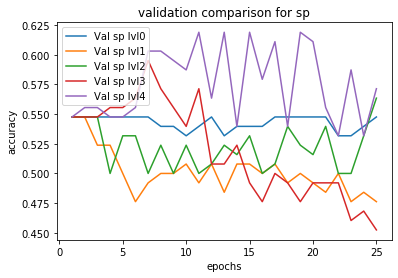

In [25]:

'''
plot the same acc graph
'''



#sp comparison
acc_sp = history_sp.history['accuracy']
val_acc_sp = history_sp.history['val_accuracy']
acc_sp_1 = history_sp_1.history['accuracy']
val_acc_sp_1 = history_sp_1.history['val_accuracy']
acc_sp_2 = history_sp_2.history['accuracy']
val_acc_sp_2 = history_sp_2.history['val_accuracy']
acc_sp_3 = history_sp_3.history['accuracy']
val_acc_sp_3 = history_sp_3.history['val_accuracy']
acc_sp_4 = history_sp_4.history['accuracy']
val_acc_sp_4 = history_sp_4.history['val_accuracy']

epochs = range(1, len(acc_sp_4) + 1)

plt.plot(epochs, val_acc_sp, label='Val sp lvl0')
plt.plot(epochs, val_acc_sp_1, label='Val sp lvl1')
plt.plot(epochs, val_acc_sp_2, label='Val sp lvl2')
plt.plot(epochs, val_acc_sp_3, label='Val sp lvl3')
plt.plot(epochs, val_acc_sp_4, label='Val sp lvl4')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.title('validation comparison for sp')
plt.legend()
plt.show()

